# Getting Dataset ready

* Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, RocCurveDisplay
from itertools import cycle
from sklearn.preprocessing import label_binarize

%matplotlib inline

* Import dataset "Indeks Standar Pencemaran Udara (ISPU) DK Jakarta Tahun 2021"

In [ ]:
df_raw = pd.read_csv('/content/drive/MyDrive/PCD/Indeks_Standar Pencemaran Udara (ISPU) Tahun 2021.csv')
df_raw

,periode_data,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,202101,2021-01-22,DKI5 (Kebon Jeruk) Jakarta Barat,45,NaN,21,13,40,15,45,PM10,BAIK
1,202101,2021-01-23,DKI5 (Kebon Jeruk) Jakarta Barat,80,NaN,22,44,44,22,80,PM10,SEDANG
2,202101,2021-01-24,DKI5 (Kebon Jeruk) Jakarta Barat,27,NaN,14,9,29,---,29,CO,BAIK
3,202101,2021-01-25,DKI5 (Kebon Jeruk) Jakarta Barat,55,NaN,19,29,67,13,67,CO,SEDANG
4,202101,2021-01-26,DKI5 (Kebon Jeruk) Jakarta Barat,57,NaN,21,23,36,16,57,PM10,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...,...
1820,202112,2021-12-30,DKI2 (Kelapa Gading),47,64,38,13,38,35,64,PM25,SEDANG
1821,202112,2021-12-31,DKI2 (Kelapa Gading),61,85,33,23,37,44,85,PM25,SEDANG
1822,202112,2021-12-01,DKI3 (Jagakarsa),53,70,43,12,32,15,70,PM25,SEDANG
1823,202112,2021-12-02,DKI3 (Jagakarsa),35,55,42,7,29,9,55,PM25,SEDANG


# Eksplorasi Data

In [ ]:
# Displays the first 10 rows of raw data
print("Data Awal:")
print(df_raw.head(10), "\n")
print(df_raw.tail(10))

Data Awal:
   periode_data     tanggal                           stasiun pm10 pm25 so2  \
0        202101  2021-01-22  DKI5 (Kebon Jeruk) Jakarta Barat   45  NaN  21   
1        202101  2021-01-23  DKI5 (Kebon Jeruk) Jakarta Barat   80  NaN  22   
2        202101  2021-01-24  DKI5 (Kebon Jeruk) Jakarta Barat   27  NaN  14   
3        202101  2021-01-25  DKI5 (Kebon Jeruk) Jakarta Barat   55  NaN  19   
4        202101  2021-01-26  DKI5 (Kebon Jeruk) Jakarta Barat   57  NaN  21   
5        202101  2021-01-27  DKI5 (Kebon Jeruk) Jakarta Barat   15  NaN  16   
6        202101  2021-01-28  DKI5 (Kebon Jeruk) Jakarta Barat   28  NaN  19   
7        202101  2021-01-29  DKI5 (Kebon Jeruk) Jakarta Barat   30  NaN  22   
8        202101  2021-01-30  DKI5 (Kebon Jeruk) Jakarta Barat   24  NaN  17   
9        202101  2021-01-31  DKI5 (Kebon Jeruk) Jakarta Barat   41  NaN  17   

   co  o3  no2 max critical categori  
0  13  40   15  45     PM10     BAIK  
1  44  44   22  80     PM10   SEDANG  
2 

In [ ]:
# Cek Dimensi Data
print(df_raw.shape, "\n")
print(df_raw.info())

(1825, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   periode_data  1825 non-null   int64 
 1   tanggal       1825 non-null   object
 2   stasiun       1825 non-null   object
 3   pm10          1825 non-null   object
 4   pm25          1763 non-null   object
 5   so2           1825 non-null   object
 6   co            1825 non-null   object
 7   o3            1825 non-null   object
 8   no2           1825 non-null   object
 9   max           1825 non-null   object
 10  critical      1809 non-null   object
 11  categori      1824 non-null   object
dtypes: int64(1), object(11)
memory usage: 171.2+ KB
None


In [ ]:
# Eksplorasi data
print("\nDeskripsi Statistik Data:")
print(df_raw.describe(include='all'))

print("\nDistribusi Data pada Kolom 'critical':")
print(df_raw['critical'].value_counts())

print("\nDistribusi Data pada Kolom 'categori':")
print(df_raw['categori'].value_counts())

print("\nDistribusi Data pada Kolom 'stasiun':")
print(df_raw['stasiun'].value_counts())


Deskripsi Statistik Data:
         periode_data     tanggal                           stasiun  pm10  \
count     1825.000000        1825                              1825  1825   
unique            NaN         365                                 5    83   
top               NaN  2021-01-22  DKI5 (Kebon Jeruk) Jakarta Barat    51   
freq              NaN           5                               365    76   
mean    202106.526027         NaN                               NaN   NaN   
std          3.448796         NaN                               NaN   NaN   
min     202101.000000         NaN                               NaN   NaN   
25%     202104.000000         NaN                               NaN   NaN   
50%     202107.000000         NaN                               NaN   NaN   
75%     202110.000000         NaN                               NaN   NaN   
max     202112.000000         NaN                               NaN   NaN   

        pm25   so2    co    o3   no2   max criti

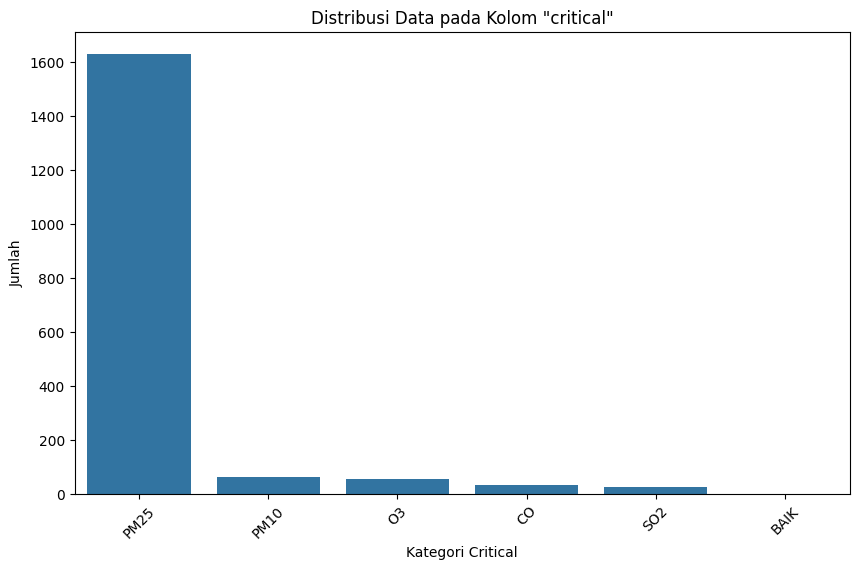

In [ ]:
# Visualisasi distribusi data pada kolom 'critical'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_raw, x='critical', order=df_raw['critical'].value_counts().index)
plt.title('Distribusi Data pada Kolom "critical"')
plt.xlabel('Kategori Critical')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

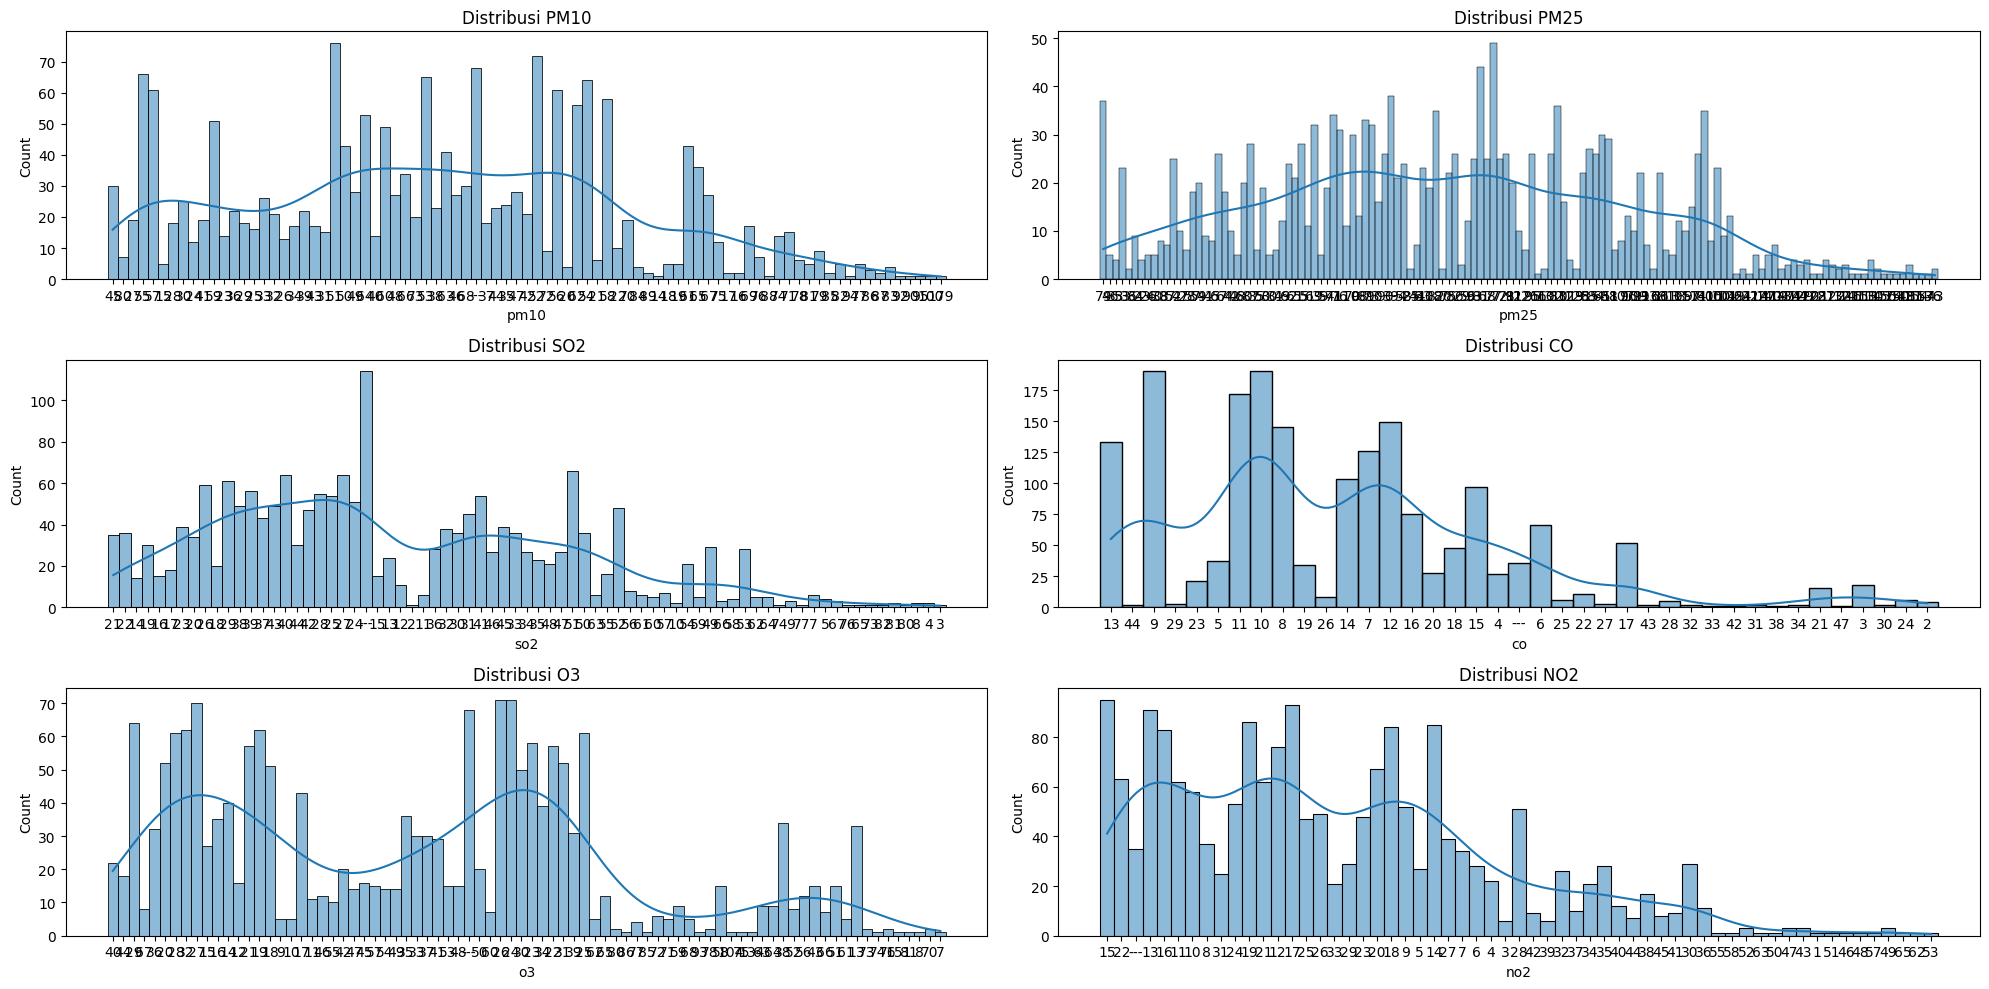

In [ ]:
# Distribusi data untuk masing-masing polutan
plt.figure(figsize=(20, 10))
for i, column in enumerate(['pm10', 'pm25', 'so2', 'co', 'o3', 'no2'], 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_raw[column], kde=True)
    plt.title(f'Distribusi {column.upper()}')
plt.tight_layout()
plt.show()

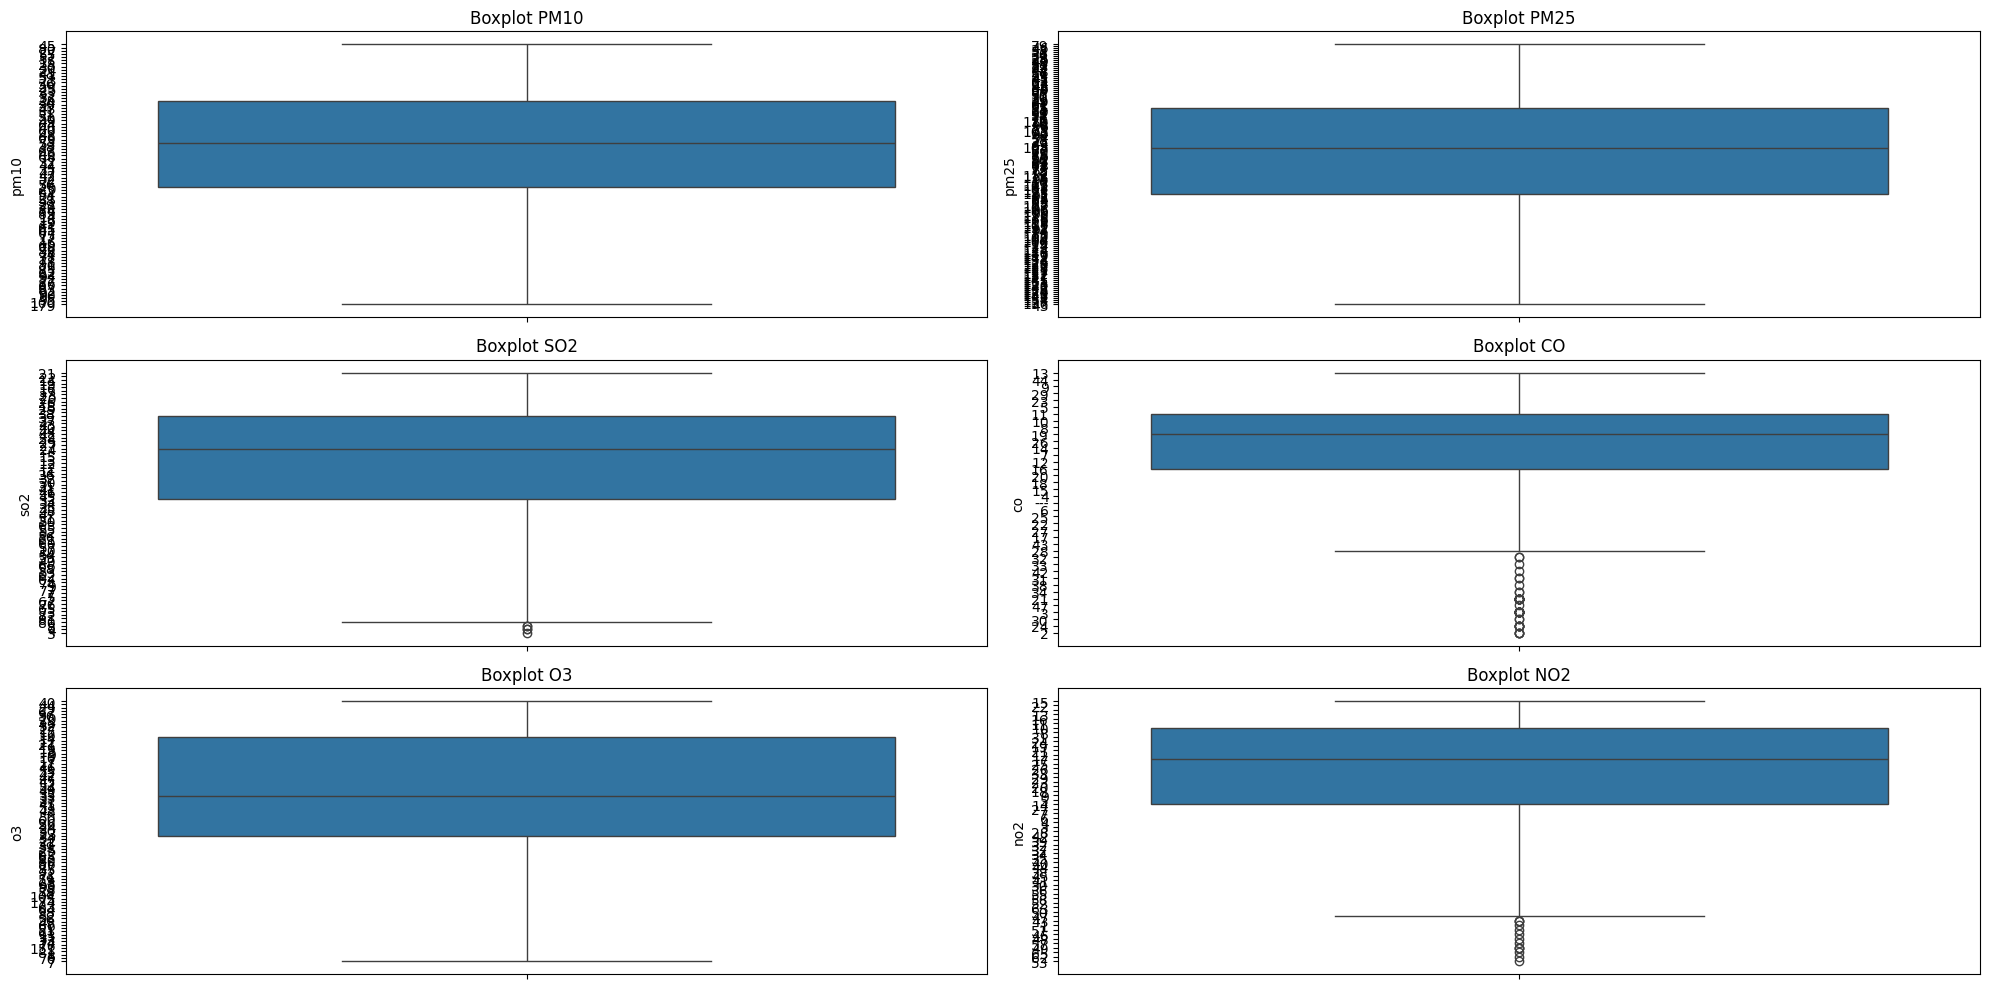

In [ ]:
# Boxplot untuk melihat distribusi dan outlier dalam setiap kolom polutan
plt.figure(figsize=(20, 10))
for i, column in enumerate(['pm10', 'pm25', 'so2', 'co', 'o3', 'no2'], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df_raw[column])
    plt.title(f'Boxplot {column.upper()}')
plt.tight_layout()
plt.show()

# Pra-Processing Data

* Cleaning Data

In [ ]:
# Menghapus kolom yang tidak diperlukan
df_clean = df_raw.drop(columns=['periode_data', 'tanggal', 'stasiun', 'max'])

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pm10      1825 non-null   object
 1   pm25      1763 non-null   object
 2   so2       1825 non-null   object
 3   co        1825 non-null   object
 4   o3        1825 non-null   object
 5   no2       1825 non-null   object
 6   critical  1809 non-null   object
 7   categori  1824 non-null   object
dtypes: object(8)
memory usage: 114.2+ KB


In [ ]:
# Mengecek data kosong
df_clean.isna().sum()

pm10         0
pm25        62
so2          0
co           0
o3           0
no2          0
critical    16
categori     1
dtype: int64

In [ ]:
# Mengganti nilai '---' dengan NaN untuk memudahkan pengisian nilai yang hilang
df_clean.replace('---', pd.NA, inplace=True)

In [ ]:
# Mengecek kembali data kosong
df_clean.isna().sum()

pm10         68
pm25        100
so2         114
co           36
o3           68
no2          35
critical     16
categori      1
dtype: int64

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pm10      1757 non-null   object
 1   pm25      1725 non-null   object
 2   so2       1711 non-null   object
 3   co        1789 non-null   object
 4   o3        1757 non-null   object
 5   no2       1790 non-null   object
 6   critical  1809 non-null   object
 7   categori  1824 non-null   object
dtypes: object(8)
memory usage: 114.2+ KB


In [ ]:
# Menghapus baris dengan nilai 'critical' yang berisi 'BAIK'
df_clean = df_clean[df_clean['critical'] != 'BAIK']

In [ ]:
# Menghapus baris dengan nilai 'categori' yang berisi 'TIDAK ADA DATA'
df_clean = df_clean[df_clean['categori'] != 'TIDAK ADA DATA']

In [ ]:
# Cek
print("\nDistribusi Data pada Kolom 'critical':")
print(df_clean['critical'].value_counts())

print("\nDistribusi Data pada Kolom 'categori':")
print(df_clean['categori'].value_counts())


Distribusi Data pada Kolom 'critical':
critical
PM25    1630
PM10      63
O3        56
CO        34
SO2       25
Name: count, dtype: int64

Distribusi Data pada Kolom 'categori':
categori
SEDANG         1349
TIDAK SEHAT     272
BAIK            187
Name: count, dtype: int64


In [ ]:
# Mengisi nilai yang hilang dengan rata-rata kolom untuk kolom numerik
for column in df_clean.select_dtypes(include=['float64', 'int64']).columns:
    df_clean[column].fillna(df_clean[column].mean(), inplace=True)

# Mengisi nilai yang hilang pada kolom non-numerik dengan modus
for column in df_clean.select_dtypes(include=['object']).columns:
    df_clean[column].fillna(df_clean[column].mode()[0], inplace=True)

# Mengonversi kolom numerik yang masih berisi string ke float
numeric_columns = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']
for column in numeric_columns:
    df_clean[column] = pd.to_numeric(df_clean[column], errors='coerce').fillna(0)

In [ ]:
# Mengecek duplikasi data
sum(df_clean.duplicated())

0

In [ ]:
# Menghitung jumlah total outlier sebelum dihapus
def count_outliers(df, columns):
    outliers_count = {}
    total_outliers = 0
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = outliers.shape[0]
        total_outliers += outliers.shape[0]
    return outliers_count, total_outliers

outliers_before, total_outliers_before = count_outliers(df_clean, numeric_columns)
print("\nJumlah total outlier sebelum dihapus:", total_outliers_before)
for col, count in outliers_before.items():
    print(f"Jumlah outliers di kolom {col} sebelum penghapusan: {count}")


Jumlah total outlier sebelum dihapus: 265
Jumlah outliers di kolom pm10 sebelum penghapusan: 26
Jumlah outliers di kolom pm25 sebelum penghapusan: 38
Jumlah outliers di kolom so2 sebelum penghapusan: 4
Jumlah outliers di kolom co sebelum penghapusan: 79
Jumlah outliers di kolom o3 sebelum penghapusan: 84
Jumlah outliers di kolom no2 sebelum penghapusan: 34


In [ ]:
# Menghilangkan atau mengganti outlier menggunakan metode IQR
def remove_or_replace_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])
    df.dropna(inplace=True)
    return df

df_clean = remove_or_replace_outliers(df_clean, numeric_columns)

# Verifikasi bahwa outlier telah dihapus
outliers_after, total_outliers_after = count_outliers(df_clean, numeric_columns)
print("\nJumlah total outlier sebelum dihapus:", total_outliers_after)
for col, count in outliers_after.items():
    print(f"Jumlah outliers yang tersisa di kolom {col} setelah penghapusan: {count}")


Jumlah total outlier sebelum dihapus: 81
Jumlah outliers yang tersisa di kolom pm10 setelah penghapusan: 7
Jumlah outliers yang tersisa di kolom pm25 setelah penghapusan: 7
Jumlah outliers yang tersisa di kolom so2 setelah penghapusan: 0
Jumlah outliers yang tersisa di kolom co setelah penghapusan: 13
Jumlah outliers yang tersisa di kolom o3 setelah penghapusan: 38
Jumlah outliers yang tersisa di kolom no2 setelah penghapusan: 16


In [ ]:
# Menampilkan data setelah pembersihan
print("\nData Setelah Pra-pemrosesan:")
print(df_clean.head(10))


Data Setelah Pra-pemrosesan:
    pm10  pm25   so2    co    o3   no2 critical categori
0   45.0  77.0  21.0  13.0  40.0  15.0     PM10     BAIK
2   27.0  77.0  14.0   9.0  29.0  15.0       CO     BAIK
6   28.0  77.0  19.0  11.0  28.0  15.0     PM10     BAIK
7   30.0  77.0  22.0  10.0  32.0  11.0       CO     BAIK
8   24.0  77.0  17.0   8.0  27.0  10.0       CO     BAIK
9   41.0  77.0  17.0  19.0  29.0   8.0     PM10     BAIK
11  30.0  46.0  21.0  14.0  16.0  24.0     PM25     BAIK
12  23.0  33.0  19.0  11.0  14.0  19.0     PM25     BAIK
13  36.0  53.0  23.0  14.0  12.0  24.0     PM25   SEDANG
14  29.0  36.0  20.0  14.0  12.0  21.0     PM25     BAIK


* One-hot Encoding

In [ ]:
# Pisah kolom kategori
categori_df = df_clean.pop('categori')

# Bikin kolom-kolom untuk representasi one hot encoding kolom 'critical'
df_encoded = pd.get_dummies(df_clean['critical'], prefix='critical')

# Gabung lagi kolom-kolom yang sudah dibersihkan dengan kolom one hot encoding dan kolom 'categori'
df_clean_encoded = pd.concat([df_clean, df_encoded, categori_df], axis=1)

# Buang kolom 'critical' yang lama (yang masih menggunakan string)
df_clean_encoded.drop('critical', axis=1, inplace=True)

In [ ]:
# Menampilkan data setelah encoding
print("\nData Setelah One Hot Encoding:")
print(df_clean_encoded.head(10))


Data Setelah One Hot Encoding:
    pm10  pm25   so2    co    o3   no2  critical_CO  critical_O3  \
0   45.0  77.0  21.0  13.0  40.0  15.0        False        False   
2   27.0  77.0  14.0   9.0  29.0  15.0         True        False   
6   28.0  77.0  19.0  11.0  28.0  15.0        False        False   
7   30.0  77.0  22.0  10.0  32.0  11.0         True        False   
8   24.0  77.0  17.0   8.0  27.0  10.0         True        False   
9   41.0  77.0  17.0  19.0  29.0   8.0        False        False   
11  30.0  46.0  21.0  14.0  16.0  24.0        False        False   
12  23.0  33.0  19.0  11.0  14.0  19.0        False        False   
13  36.0  53.0  23.0  14.0  12.0  24.0        False        False   
14  29.0  36.0  20.0  14.0  12.0  21.0        False        False   

    critical_PM10  critical_PM25  critical_SO2 categori  
0            True          False         False     BAIK  
2           False          False         False     BAIK  
6            True          False         Fals

* Eksplorasi Data Bersih

In [ ]:
print("\nDeskripsi Statistik Data Bersih:")
print(df_clean_encoded.describe(include='all'))


Deskripsi Statistik Data Bersih:
               pm10         pm25          so2           co           o3  \
count   1571.000000  1571.000000  1571.000000  1571.000000  1571.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      51.452578    77.034373    36.241884    11.112667    29.809675   
std       13.148326    20.273137    12.274257     3.763981    11.550666   
min       19.000000    24.000000     4.000000     2.000000     8.000000   
25%       44.000000    64.000000    26.000000     8.000000    22.000000   
50%       53.000000    77.000000    37.000000    11.000000    27.000000   
75%       60.000000    90.000000    47.000000    13.000000    36.000000   
max       86.000000   131.000000    77.000000    21.000000    62.000000   

                no2 critical_CO critical_O3 critical_PM10 critica

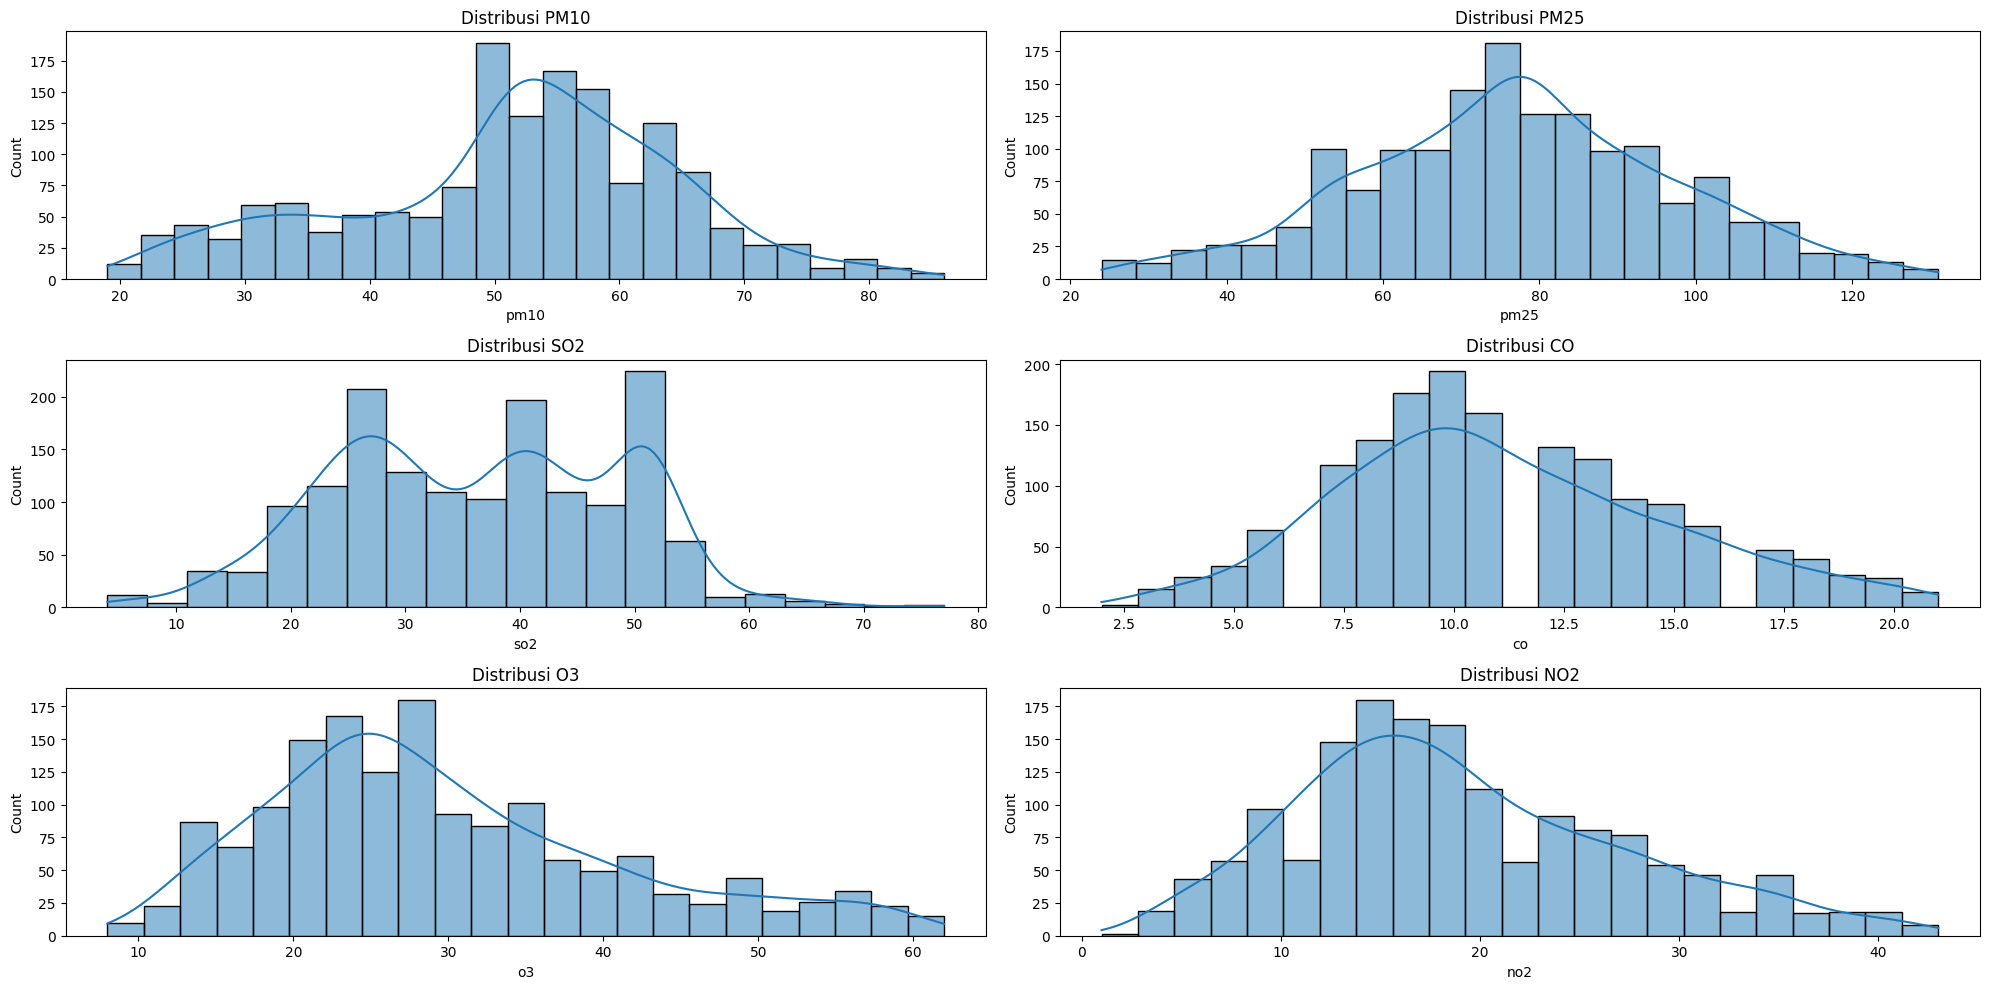

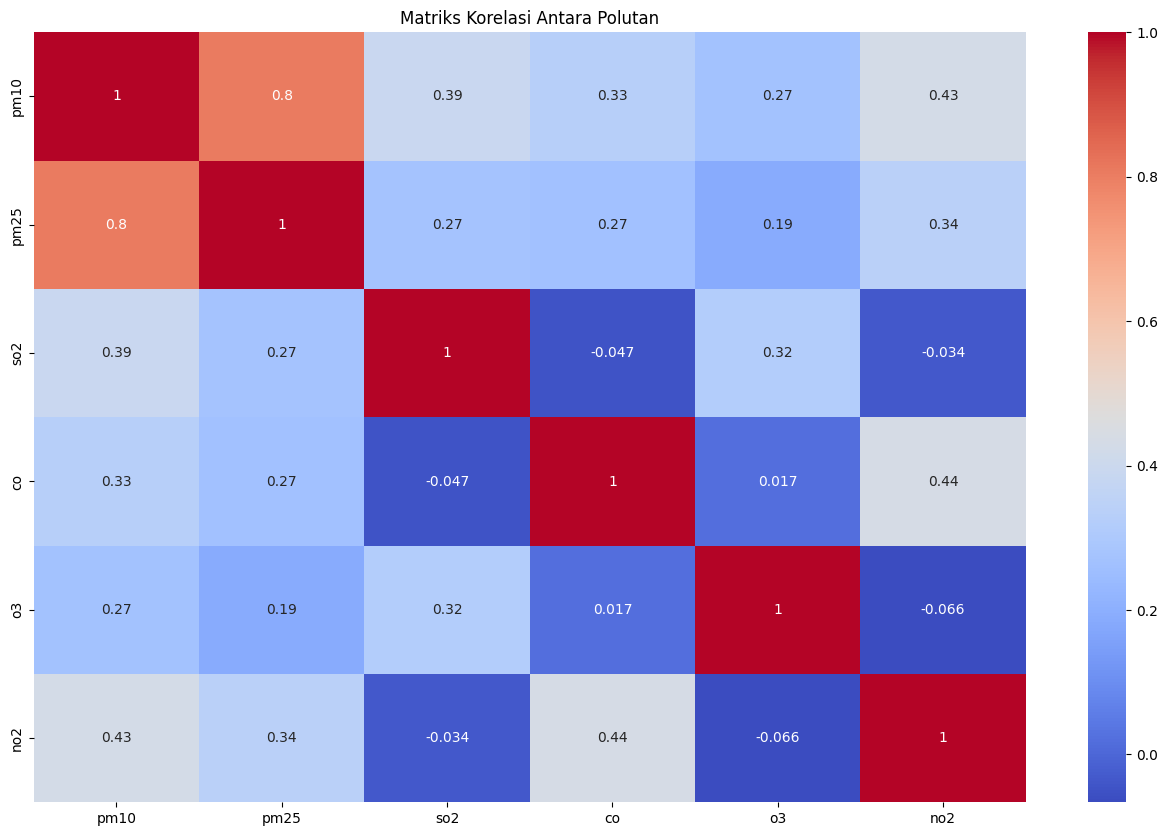

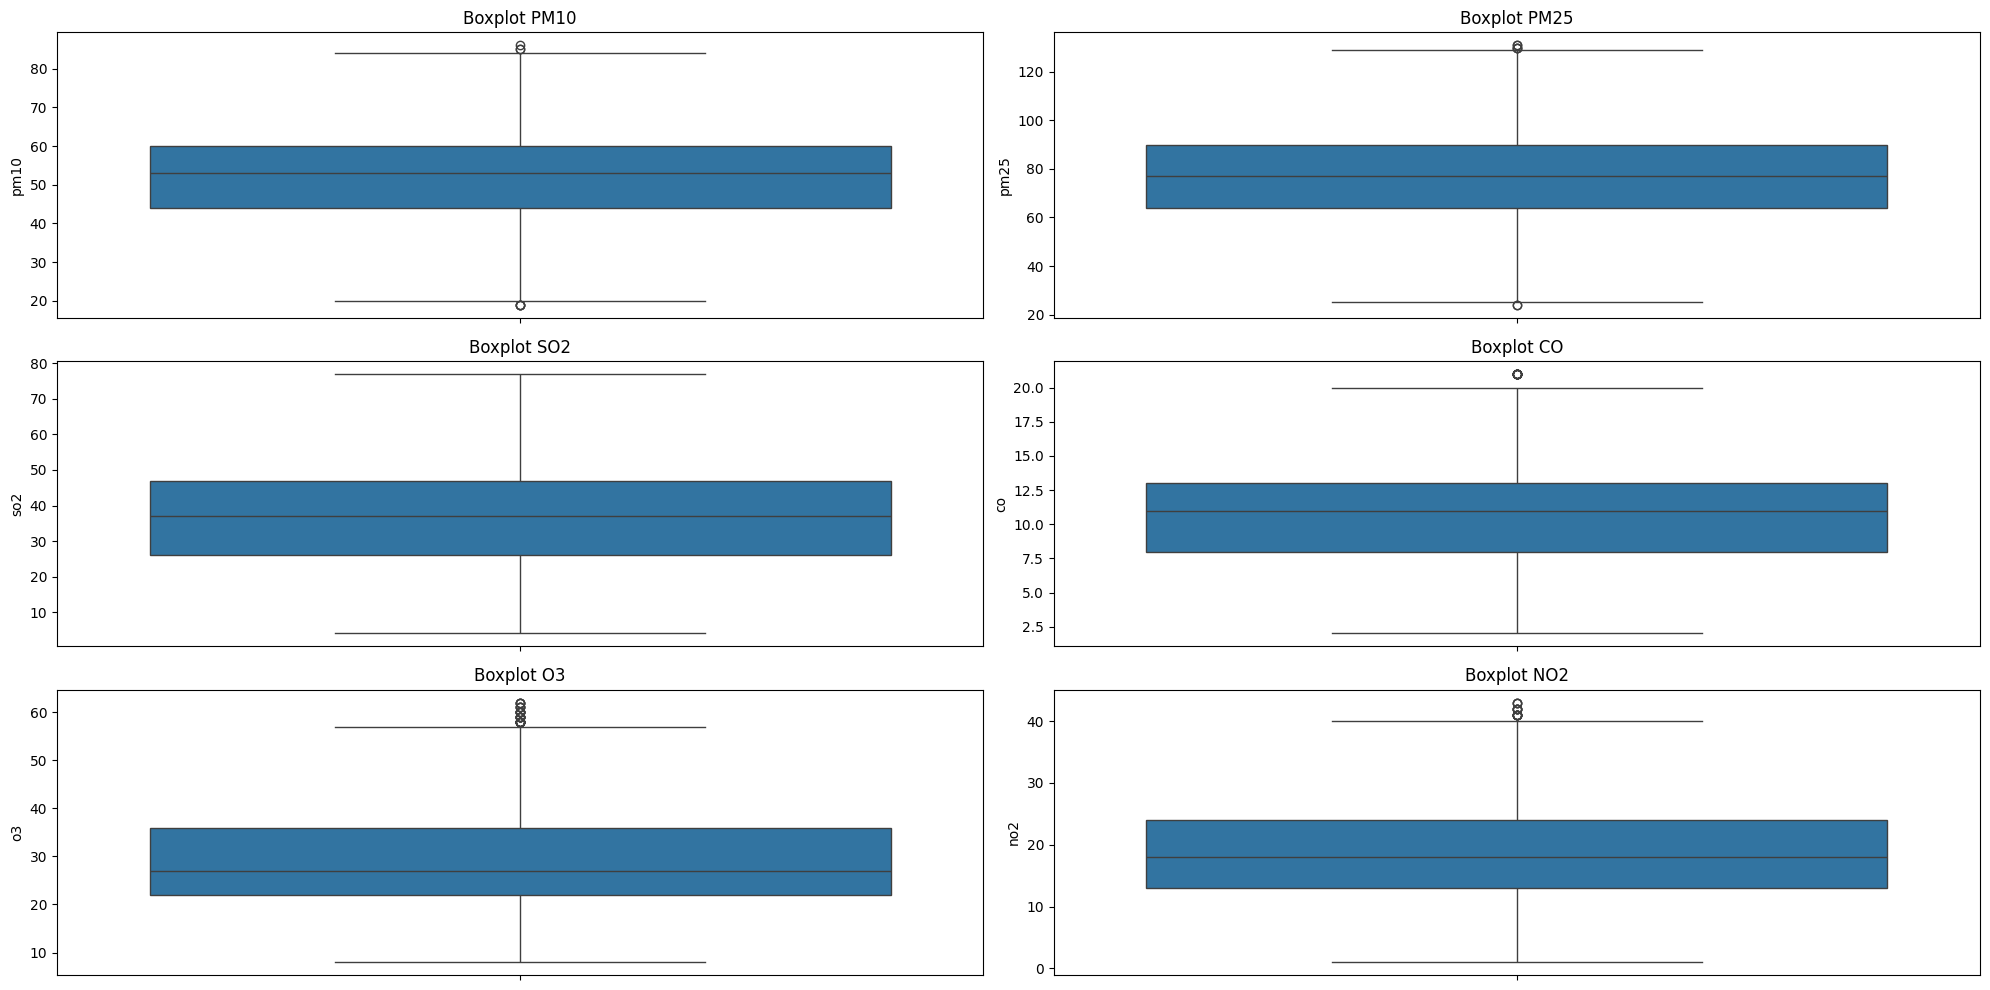

In [ ]:
# Distribusi data untuk masing-masing polutan setelah pembersihan (cleaning) dan penghapusan outlier
plt.figure(figsize=(20, 10))
for i, column in enumerate(['pm10', 'pm25', 'so2', 'co', 'o3', 'no2'], 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_clean_encoded[column], kde=True)
    plt.title(f'Distribusi {column.upper()}')
plt.tight_layout()
plt.show()

# Korelasi antara berbagai polutan setelah pembersihan (cleaning) dan penghapusan outlier
plt.figure(figsize=(16, 10))
correlation_matrix = df_clean_encoded[['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi Antara Polutan')
plt.show()

# Boxplot untuk melihat distribusi dan outlier dalam setiap kolom polutan setelah pembersihan (cleaning) dan penghapusan outlier
plt.figure(figsize=(20, 10))
for i, column in enumerate(['pm10', 'pm25', 'so2', 'co', 'o3', 'no2'], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df_clean_encoded[column])
    plt.title(f'Boxplot {column.upper()}')
plt.tight_layout()
plt.show()

In [ ]:
df_clean_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1571 entries, 0 to 1824
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pm10           1571 non-null   float64
 1   pm25           1571 non-null   float64
 2   so2            1571 non-null   float64
 3   co             1571 non-null   float64
 4   o3             1571 non-null   float64
 5   no2            1571 non-null   float64
 6   critical_CO    1571 non-null   bool   
 7   critical_O3    1571 non-null   bool   
 8   critical_PM10  1571 non-null   bool   
 9   critical_PM25  1571 non-null   bool   
 10  critical_SO2   1571 non-null   bool   
 11  categori       1571 non-null   object 
dtypes: bool(5), float64(6), object(1)
memory usage: 105.9+ KB


Keseimbangan Kategori dalam Kolom 'categori':
categori
SEDANG         1202
TIDAK SEHAT     206
BAIK            163
Name: count, dtype: int64


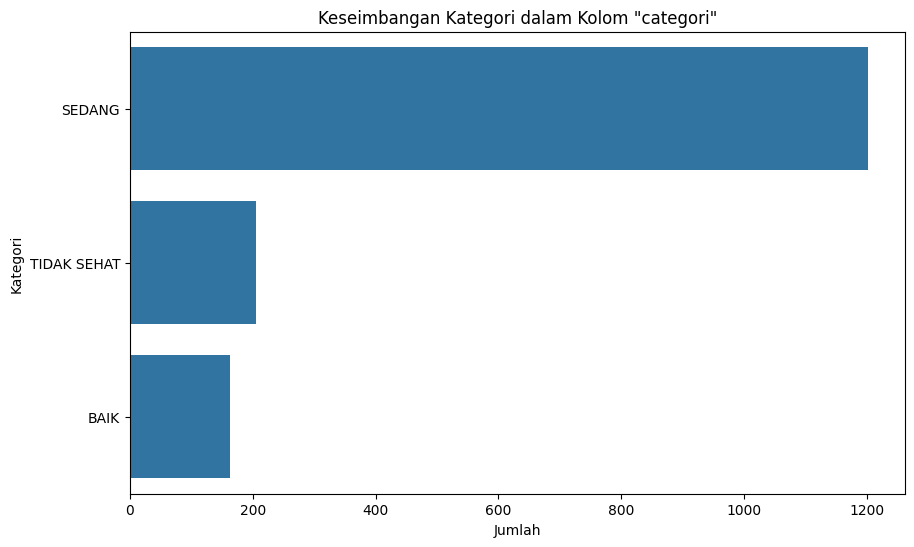

In [ ]:
# Cek keseimbangan kategori dalam kolom 'categori'
category_counts = categori_df.value_counts()
print("Keseimbangan Kategori dalam Kolom 'categori':")
print(category_counts)

# Visualisasi keseimbangan kategori dalam kolom 'categori'
plt.figure(figsize=(10, 6))
sns.countplot(y=categori_df, order=categori_df.value_counts().index)
plt.title('Keseimbangan Kategori dalam Kolom "categori"')
plt.xlabel('Jumlah')
plt.ylabel('Kategori')
plt.show()

* Set Fitur dan Label

In [ ]:
# Membagi data menjadi fitur dan label
X = df_clean_encoded.drop(columns=['categori'])
y = df_clean_encoded['categori']

* Normalisasi

In [ ]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

* Split Seluruh Data

In [ ]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [ ]:
# Menampilkan hasil pra-pemrosesan seluruh data
print("\nFitur setelah normalisasi (beberapa baris):")
print(X_train[:5])
print("\nLabel (beberapa baris):")
print(y_train[:5])

print("\nUkuran set pelatihan dan pengujian:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Fitur setelah normalisasi (beberapa baris):
[[-2.16465863 -1.82735238 -0.75318833 -1.62450701 -1.19595461 -1.09411238
  -0.1322386  -0.12716432 -0.16573755  0.28104006 -0.11639754]
 [ 0.42204524  0.44238254  0.46927072 -0.29570324  0.01648262 -0.36936865
  -0.1322386  -0.12716432 -0.16573755  0.28104006 -0.11639754]
 [ 0.19380666  0.68909285 -1.24217195  1.56462203 -0.07012004  0.83853757
  -0.1322386  -0.12716432 -0.16573755  0.28104006 -0.11639754]
 [-0.94738622 -0.64314286 -0.75318833 -0.29570324 -0.41653068  0.59695632
  -0.1322386  -0.12716432 -0.16573755  0.28104006 -0.11639754]
 [-0.94738622 -0.9885373  -0.18270744 -0.29570324 -1.6289679  -1.45648424
  -0.1322386  -0.12716432 -0.16573755  0.28104006 -0.11639754]]

Label (beberapa baris):
361       BAIK
1690    SEDANG
297     SEDANG
385     SEDANG
1340    SEDANG
Name: categori, dtype: object

Ukuran set pelatihan dan pengujian:
X_train: (1256, 11)
X_test: (315, 11)
y_train: (1256,)
y_test: (315,)


In [ ]:
# Menampilkan distribusi kategori setelah normalisasi dan split data
print("\nDistribusi kategori dalam set pelatihan:")
print(y_train.value_counts())
print("\nDistribusi kategori dalam set pengujian:")
print(y_test.value_counts())


Distribusi kategori dalam set pelatihan:
categori
SEDANG         972
TIDAK SEHAT    161
BAIK           123
Name: count, dtype: int64

Distribusi kategori dalam set pengujian:
categori
SEDANG         230
TIDAK SEHAT     45
BAIK            40
Name: count, dtype: int64


* Oversampling

In [ ]:
# Oversampling
smote = SMOTE(random_state=0)
X_resampled_over, y_resampled_over = smote.fit_resample(X_train, y_train)


Keseimbangan Kategori setelah SMOTE:
categori
BAIK           972
SEDANG         972
TIDAK SEHAT    972
Name: count, dtype: int64


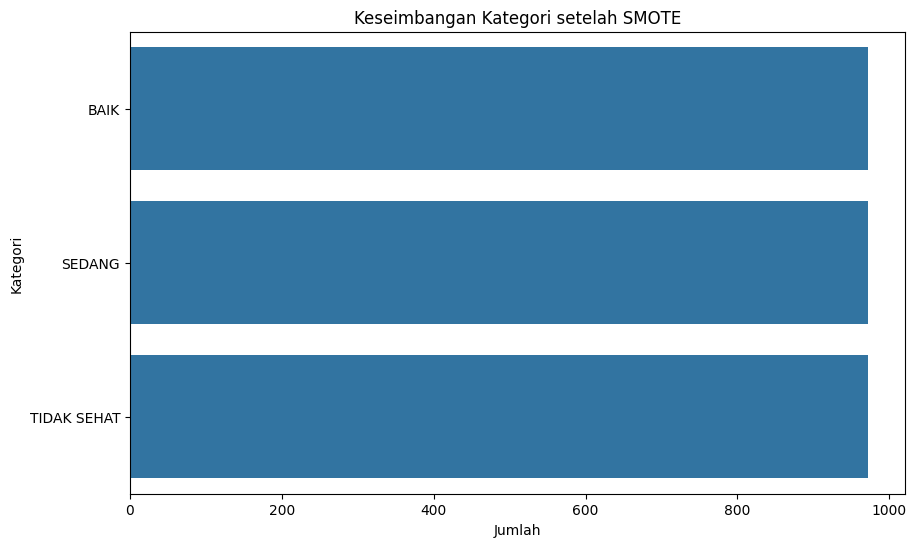

In [ ]:
# Cek keseimbangan kategori setelah SMOTE
category_counts_resampled_smote = pd.Series(y_resampled_over).value_counts()
print("\nKeseimbangan Kategori setelah SMOTE:")
print(category_counts_resampled_smote)

# Visualisasi keseimbangan kategori setelah SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(y=y_resampled_over, order=pd.Series(y_resampled_over).value_counts().index)
plt.title('Keseimbangan Kategori setelah SMOTE')
plt.xlabel('Jumlah')
plt.ylabel('Kategori')
plt.show()

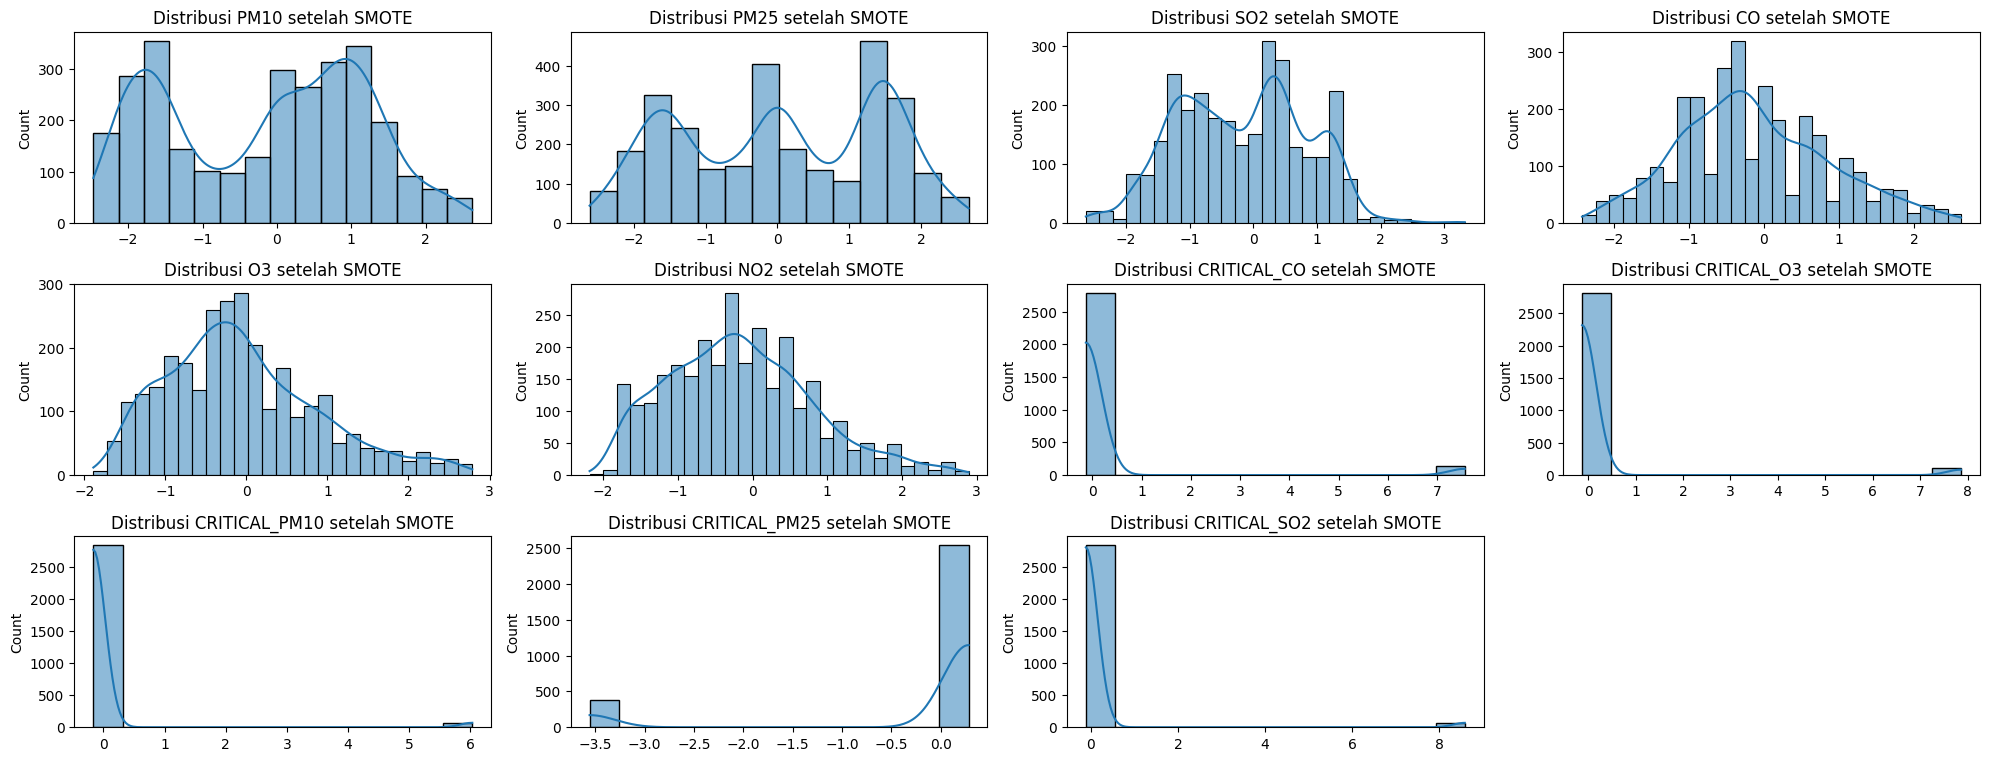

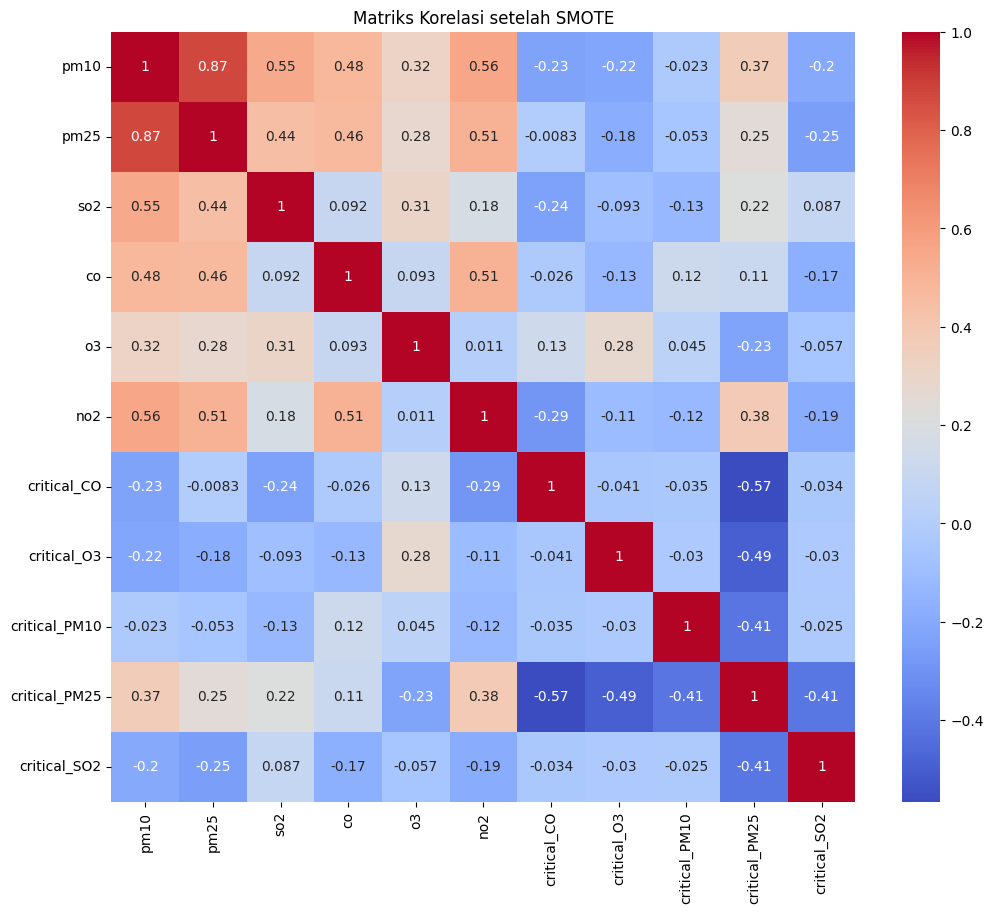

In [ ]:
# Visualisasi distribusi data untuk masing-masing polutan setelah oversampling dengan SMOTE
plt.figure(figsize=(20, 10))
for i, column in enumerate(X.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(X_resampled_over[:, i-1], kde=True)
    plt.title(f'Distribusi {column.upper()} setelah SMOTE')
plt.tight_layout()
plt.show()

# Korelasi antara berbagai polutan setelah SMOTE
plt.figure(figsize=(12, 10))
correlation_matrix_smote = pd.DataFrame(X_resampled_over, columns=X.columns).corr()
sns.heatmap(correlation_matrix_smote, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi setelah SMOTE')
plt.show()

* Undersampling

In [ ]:
# Undersampling
undersample = RandomUnderSampler(random_state=0)
X_resampled_under, y_resampled_under = undersample.fit_resample(X_train, y_train)


Keseimbangan Kategori setelah Undersampling:
categori
BAIK           123
SEDANG         123
TIDAK SEHAT    123
Name: count, dtype: int64


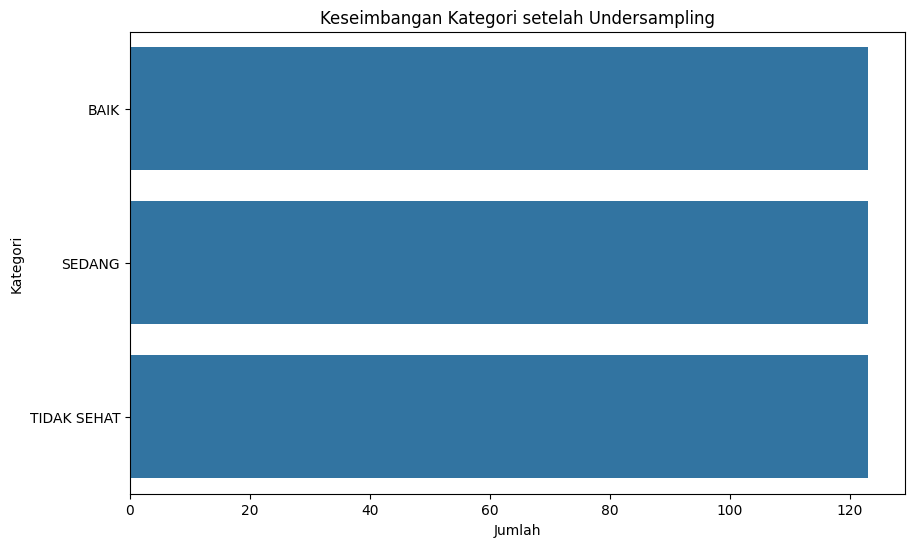

In [ ]:
# Cek keseimbangan kategori setelah undersampling
category_counts_resampled_under = pd.Series(y_resampled_under).value_counts()
print("\nKeseimbangan Kategori setelah Undersampling:")
print(category_counts_resampled_under)

# Visualisasi keseimbangan kategori setelah undersampling
plt.figure(figsize=(10, 6))
sns.countplot(y=y_resampled_under, order=pd.Series(y_resampled_under).value_counts().index)
plt.title('Keseimbangan Kategori setelah Undersampling')
plt.xlabel('Jumlah')
plt.ylabel('Kategori')
plt.show()

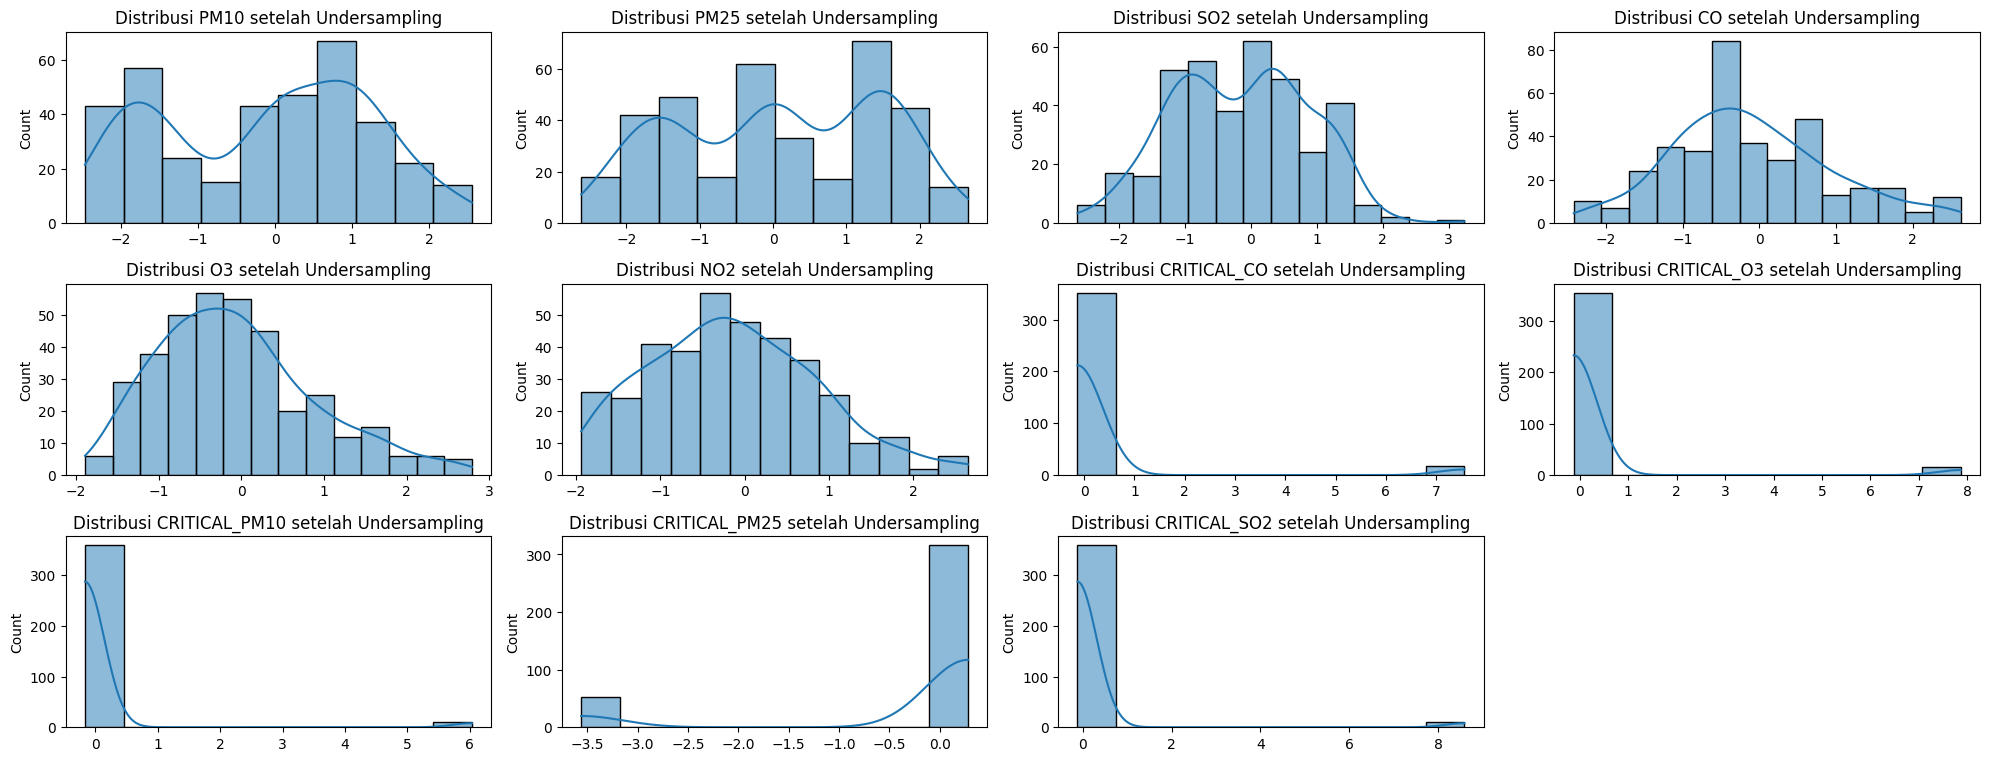

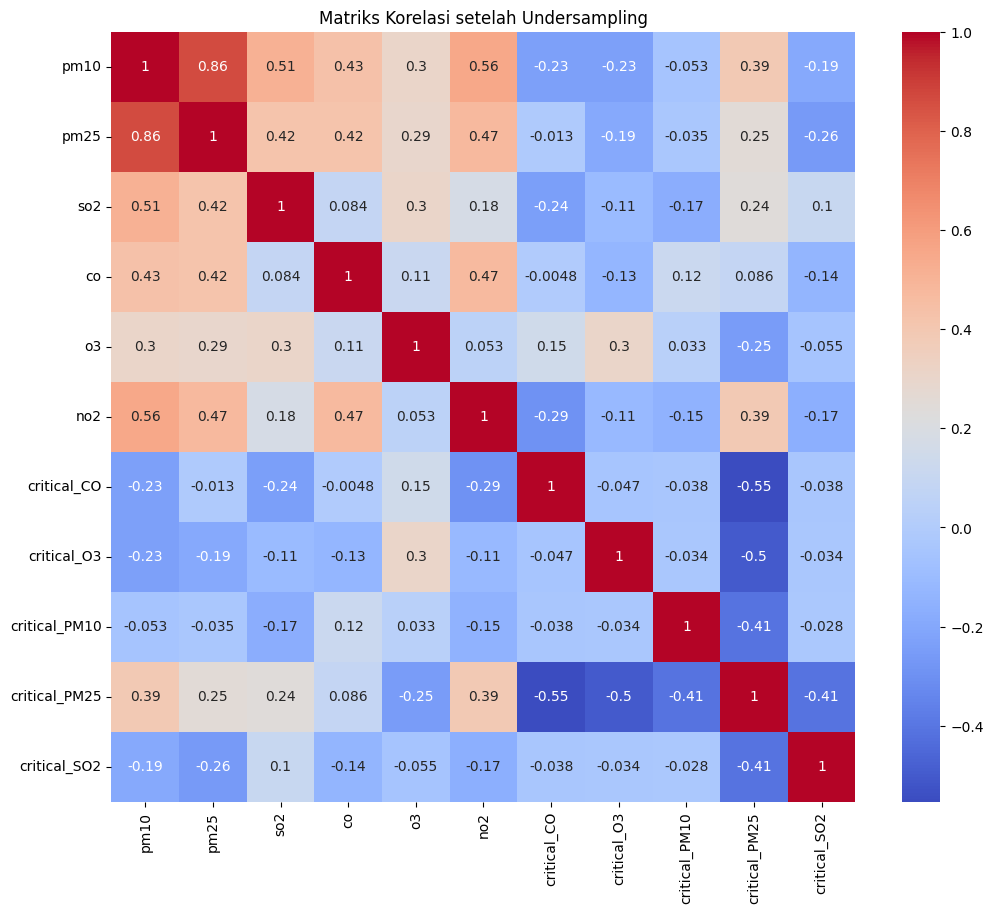

In [ ]:
# Visualisasi distribusi data untuk masing-masing polutan setelah undersampling
plt.figure(figsize=(20, 10))
for i, column in enumerate(X.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(X_resampled_under[:, i-1], kde=True)
    plt.title(f'Distribusi {column.upper()} setelah Undersampling')
plt.tight_layout()
plt.show()

# Korelasi antara berbagai polutan setelah undersampling
plt.figure(figsize=(12, 10))
correlation_matrix_under = pd.DataFrame(X_resampled_under, columns=X.columns).corr()
sns.heatmap(correlation_matrix_under, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi setelah Undersampling')
plt.show()

##-

In [ ]:
# Sample 1000 Data
df_sample = df_clean_encoded.sample(n=1000, random_state=42)

# Membagi data menjadi fitur dan label
X_sampled = df_sample.drop(columns=['categori'])
y_sampled = df_sample['categori']

# Normalisasi fitur sample
scaler = StandardScaler()
X_sampled_scaled = scaler.fit_transform(X_sampled)

# Membagi data menjadi set pelatihan dan pengujian
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sampled_scaled, y_sampled, test_size=0.2, random_state=0)

In [ ]:
# Menampilkan hasil pra-pemrosesan setelah pemilihan 1000 sample
print("\nFitur setelah normalisasi dan pemilihan 1000 sample(beberapa baris):")
print(X_train_sample[:5])
print("\nLabel (beberapa baris):")
print(y_train_sample[:5])

print("\nUkuran set pelatihan dan pengujian setelah pemilihan 1000 sample:")
print("X_train_sample:", X_train_sample.shape)
print("X_test_sample:", X_test_sample.shape)
print("y_train_sample:", y_train_sample.shape)
print("y_test_sample:", y_test_sample.shape)


Fitur setelah normalisasi dan pemilihan 1000 sample(beberapa baris):
[[-1.27425278 -1.35213927 -0.34515657 -2.17516596  0.37404761 -1.71566834
  -0.12340351 -0.11020775 -0.166581    0.25929878 -0.09529814]
 [-1.12139136 -1.00069954 -0.67294058 -0.02286816  0.55056843  0.22431
  -0.12340351 -0.11020775 -0.166581    0.25929878 -0.09529814]
 [-0.28065356  0.20423669  0.31041146 -1.36805429 -0.33203566 -0.38193324
  -0.12340351 -0.11020775 -0.166581    0.25929878 -0.09529814]
 [-1.5035449  -0.95049386  1.2118175  -0.56094261  0.55056843  0.22431
  -0.12340351 -0.11020775 -0.166581    0.25929878 -0.09529814]
 [-1.57997561 -1.85419603 -1.90213064  0.24616906 -0.42029607 -0.86692782
  -0.12340351 -0.11020775 -0.166581    0.25929878 -0.09529814]]

Label (beberapa baris):
489     SEDANG
1356    SEDANG
976     SEDANG
1355    SEDANG
114       BAIK
Name: categori, dtype: object

Ukuran set pelatihan dan pengujian setelah pemilihan 1000 sample:
X_train_sample: (800, 11)
X_test_sample: (200, 11)
y_

# Modeling Data

Dalam melakukan modelling data, kami menggunakan 3 pendekatan berbeda:
*   Menggunakan semua data yang ada tanpa memperhatikan distribusi kelas
*   Menggunakan undersampling agar distribusi kelas seimbang
*   Menggunakan oversampling agar distribusi kelas seimbang

Ketiga pendekatan ini kami lakukan untuk membandingkan kinerja model-model yang dihasilkan dan mencari pendekatan yang paling baik untuk kasus kami.


#####1. Menggunakan seluruh data (imbalanced)

Best k untuk data testing: 5 dengan akurasi 0.9238095238095239


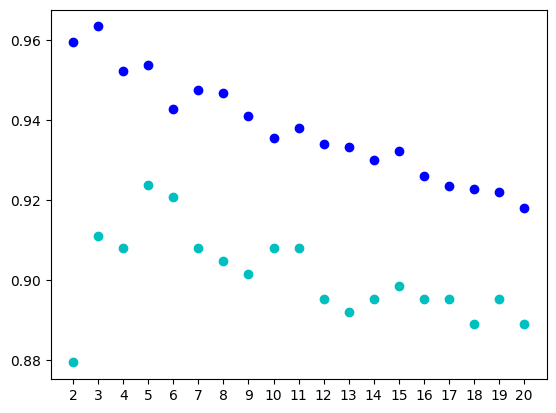

In [ ]:
# Seluruh data tanpa sampling

K = []
training_imbalance = []
test_imbalance = []
scores = {}

for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)

    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)

    training_imbalance.append(training_score)
    test_imbalance.append(test_score)
    scores[k] = [training_score, test_score]

# Cari nilai k dengan skor terbaik
best_k = max(scores, key=lambda k: scores[k][1])
print("Best k untuk data testing:", best_k, "dengan akurasi", scores[best_k][1])

plt.scatter(K, training_imbalance, color ='b')
plt.scatter(K, test_imbalance, color ='c')
plt.xticks(K, K)
plt.show()

Hasil Klasifikasi K = 5:
              precision    recall  f1-score   support

        BAIK       0.89      0.80      0.84        40
      SEDANG       0.93      0.97      0.95       230
 TIDAK SEHAT       0.92      0.80      0.86        45

    accuracy                           0.92       315
   macro avg       0.91      0.86      0.88       315
weighted avg       0.92      0.92      0.92       315



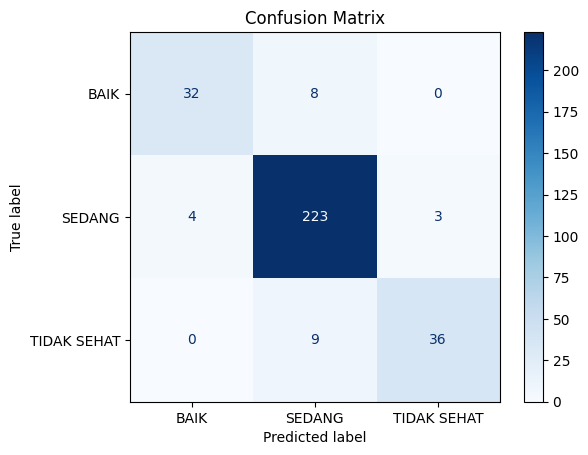

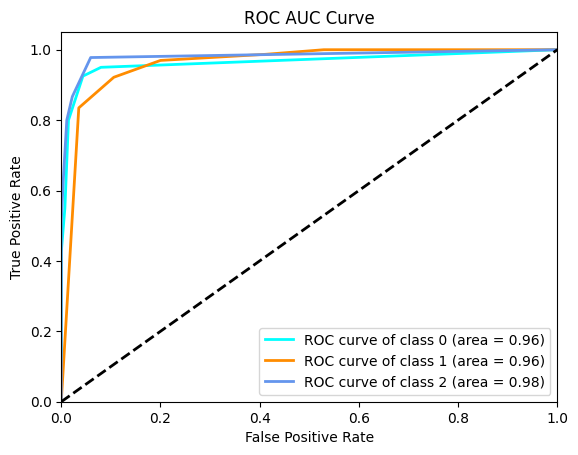

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=5)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

# Laporan klasifikasi
report = classification_report(y_test, y_pred)
print(f'Hasil Klasifikasi K = 5:\n{report}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

y_test_binarized = label_binarize(y_test, classes=y_test.unique())
n_classes = y_test_binarized.shape[1]

# Plot ROC curve untuk setiap kelas
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], best_knn.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
plt.figure()
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

#####2. Menggunakan data oversampling

Best k untuk data testing: 3 dengan akurasi 0.9015873015873016


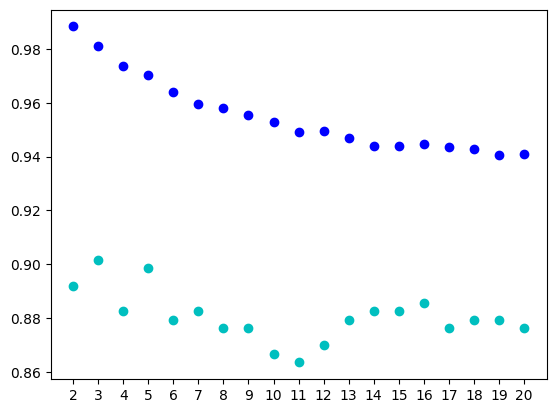

In [ ]:
K = []
training_over = []
test_over = []
scores = {}

for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_resampled_over, y_resampled_over)

    training_score = clf.score(X_resampled_over, y_resampled_over)
    test_score = clf.score(X_test, y_test)
    K.append(k)

    training_over.append(training_score)
    test_over.append(test_score)
    scores[k] = [training_score, test_score]

# Cari nilai k dengan skor terbaik
best_k = max(scores, key=lambda k: scores[k][1])
print("Best k untuk data testing:", best_k, "dengan akurasi", scores[best_k][1])

plt.scatter(K, training_over, color ='b')
plt.scatter(K, test_over, color ='c')
plt.xticks(K, K)
plt.show()

Hasil Klasifikasi K = 3:
              precision    recall  f1-score   support

        BAIK       0.73      0.90      0.81        40
      SEDANG       0.96      0.90      0.93       230
 TIDAK SEHAT       0.80      0.91      0.85        45

    accuracy                           0.90       315
   macro avg       0.83      0.90      0.86       315
weighted avg       0.91      0.90      0.90       315



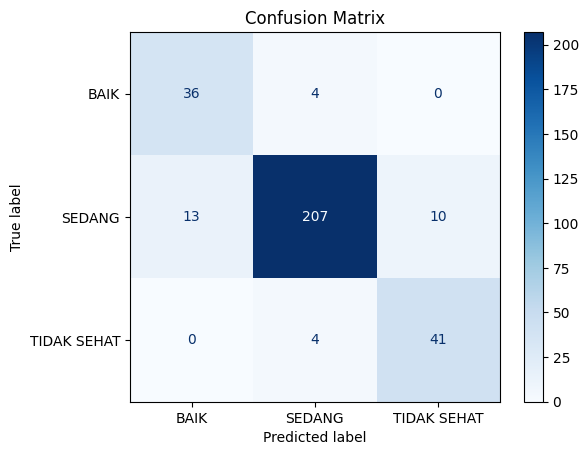

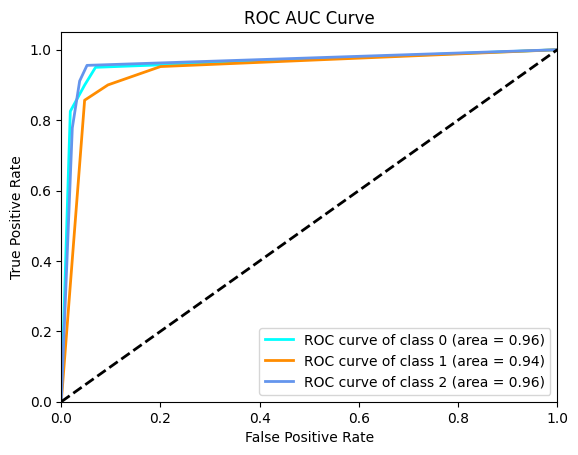

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=3)
best_knn.fit(X_resampled_over, y_resampled_over)
y_pred = best_knn.predict(X_test)

# Laporan klasifikasi
report = classification_report(y_test, y_pred)
print(f'Hasil Klasifikasi K = 3:\n{report}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

y_test_binarized = label_binarize(y_test, classes=y_test.unique())
n_classes = y_test_binarized.shape[1]

# Plot ROC curve untuk setiap kelas
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], best_knn.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
plt.figure()
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

#####3. Menggunakan data undersampling

Best k untuk data testing: 2 dengan akurasi 0.8603174603174604


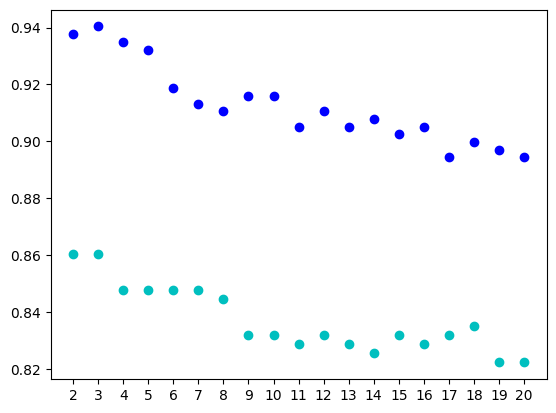

In [ ]:
# Data undersampling

K = []
training_under = []
test_under = []
scores = {}

for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_resampled_under, y_resampled_under)

    training_score = clf.score(X_resampled_under, y_resampled_under)
    test_score = clf.score(X_test, y_test)
    K.append(k)

    training_under.append(training_score)
    test_under.append(test_score)
    scores[k] = [training_score, test_score]

# Cari nilai k dengan skor terbaik
best_k = max(scores, key=lambda k: scores[k][1])
print("Best k untuk data testing:", best_k, "dengan akurasi", scores[best_k][1])

plt.scatter(K, training_under, color ='b')
plt.scatter(K, test_under, color ='c')
plt.xticks(K, K)
plt.show()

Hasil Klasifikasi K = 2:
              precision    recall  f1-score   support

        BAIK       0.57      1.00      0.73        40
      SEDANG       0.97      0.83      0.90       230
 TIDAK SEHAT       0.83      0.87      0.85        45

    accuracy                           0.86       315
   macro avg       0.79      0.90      0.82       315
weighted avg       0.90      0.86      0.87       315



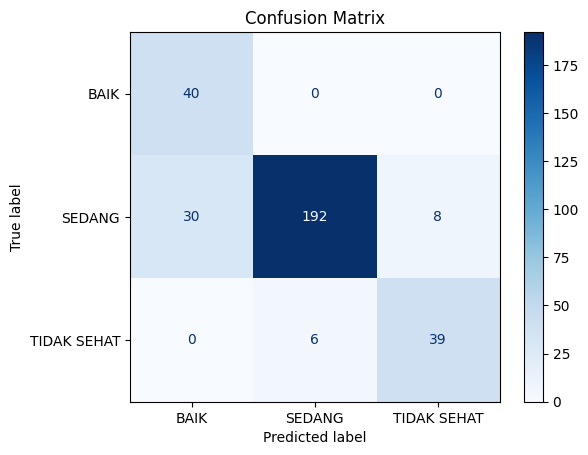

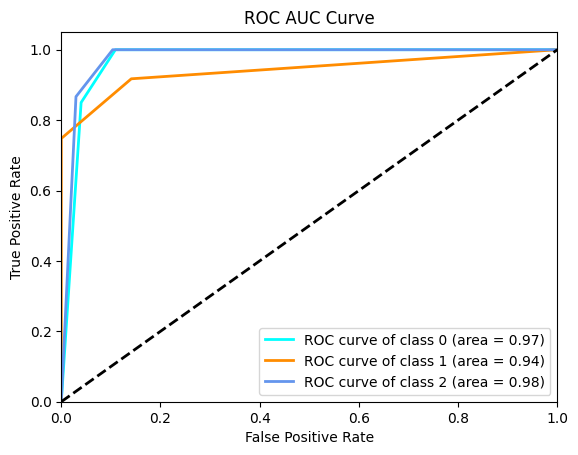

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=2)
best_knn.fit(X_resampled_under, y_resampled_under)
y_pred = best_knn.predict(X_test)

# Laporan klasifikasi
report = classification_report(y_test, y_pred)
print(f'Hasil Klasifikasi K = 2:\n{report}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

y_test_binarized = label_binarize(y_test, classes=y_test.unique())
n_classes = y_test_binarized.shape[1]

# Plot ROC curve untuk setiap kelas
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], best_knn.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
plt.figure()
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()